# U.S. Renewable Energy Consumption Analysis

Objective : Analyze renewable energy consumption trends in the U.S., identify growth patterns across different sources, and visualize the contribution of each source over time.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("dataset.csv")
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

In [54]:
df.describe()

,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,1998.042414,6.491028,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,4.834706,46.285969,70.872209,0.428949,0.031752,15.757374,0.953720
std,14.747378,3.456934,0.373819,1.550857,5.774511,18.124793,46.900639,8.247359,21.911920,15.601717,64.241520,71.197761,2.687850,0.258149,32.134059,3.985003
min,1973.000000,1.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.483000,0.000000,0.000000,0.000000,0.258000,2.070000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,6.000000,0.000000,0.357000,0.004000,0.000000,12.062000,0.108000,0.007000,0.000000,9.716000,50.984000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,0.036000,1.673000,0.774000,0.001000,51.808000,12.764000,1.283000,0.000000,89.359000,126.982000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,12.000000,2.047000,5.951000,64.040000,157.409000,183.628000,32.875000,104.420000,75.373000,233.200000,308.175000,38.344000,4.101000,117.453000,27.871000


In [55]:
df.isnull().sum()

Year                                  0
Month                                 0
Sector                                0
Hydroelectric Power                   0
Geothermal Energy                     0
Solar Energy                          0
Wind Energy                           0
Wood Energy                           0
Waste Energy                          0
Fuel Ethanol, Excluding Denaturant    0
Biomass Losses and Co-products        0
Biomass Energy                        0
Total Renewable Energy                0
Renewable Diesel Fuel                 0
Other Biofuels                        0
Conventional Hydroelectric Power      0
Biodiesel                             0
dtype: int64

### Total Renewable Energy Trend

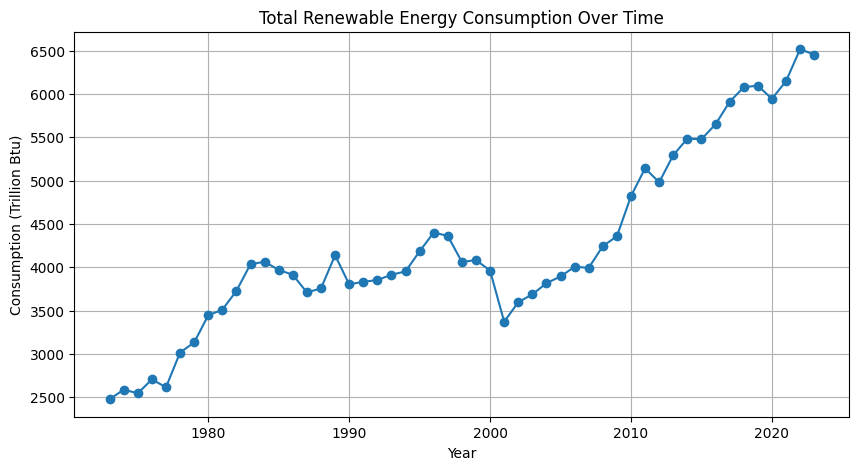

In [56]:
df_clean = df[df["Year"] < 2024] # dropping year 2024 because of fewer entries
total_trend = df_clean.groupby("Year")["Total Renewable Energy"].sum()

plt.figure(figsize=(10,5))
plt.plot(total_trend.index, total_trend.values, marker ="o")
plt.title("Total Renewable Energy Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Consumption (Trillion Btu)")
plt.grid(True)
plt.show()

- Renewable energy consumption in the U.S. has shown long-term growth, rising from ~2,500 units in the 1960s to over 6,500 units in recent years.
- The 1980s and early 2000s show periods of stagnation or decline, reflecting economic downturns and limited renewable adoption.
- Post-2005, there is a clear upward trend, driven by the rapid expansion of wind and solar energy.

### Growth of Key Renewable Energy Sources Over Time

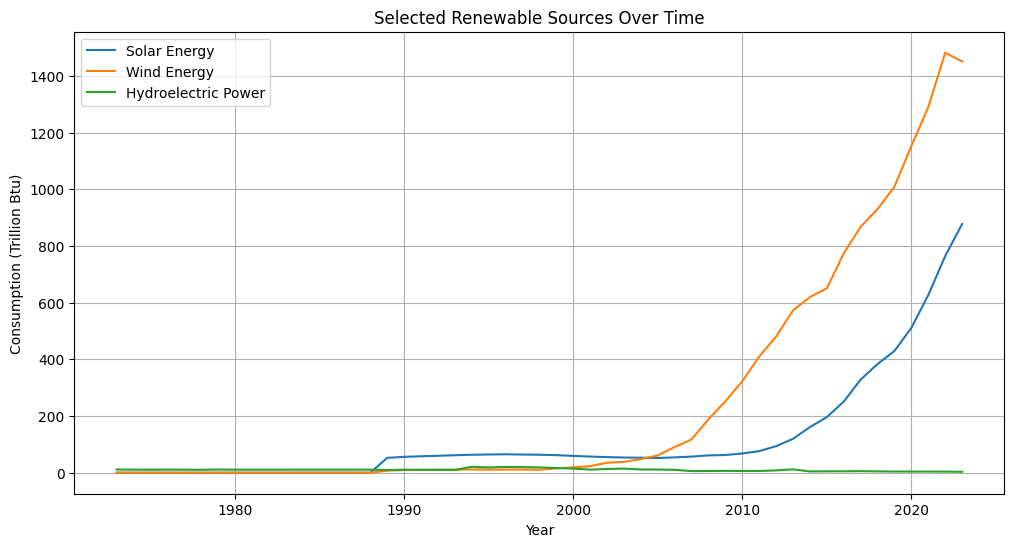

In [57]:
sources = ['Hydroelectric Power','Geothermal Energy','Solar Energy',
           'Wind Energy','Wood Energy','Waste Energy',
           'Fuel Ethanol, Excluding Denaturant','Biomass Losses and Co-products',
           'Biomass Energy','Renewable Diesel Fuel','Other Biofuels',
           'Conventional Hydroelectric Power','Biodiesel']
df_sources= df_clean.groupby("Year")[sources].sum()

plt.figure(figsize=(12,6))
for col in ['Solar Energy','Wind Energy','Hydroelectric Power']:
    plt.plot(df_sources.index, df_sources[col], label = col)
plt.title("Selected Renewable Sources Over Time")
plt.xlabel("Year")
plt.ylabel("Consumption (Trillion Btu)")
plt.legend()
plt.grid(True)
plt.show()

- Wind energy has grown most rapidly, overtaking hydro around the 2010s.
- Solar energy shows exponential growth, particularly after 2010, reflecting falling costs and policy incentives.
- Hydroelectric power remains steady but shows little growth, suggesting it has reached capacity limits in the U.S.
- Together, these trends highlight a shift from traditional hydro to newer renewables (wind, solar).

### Sector-Level Analysis

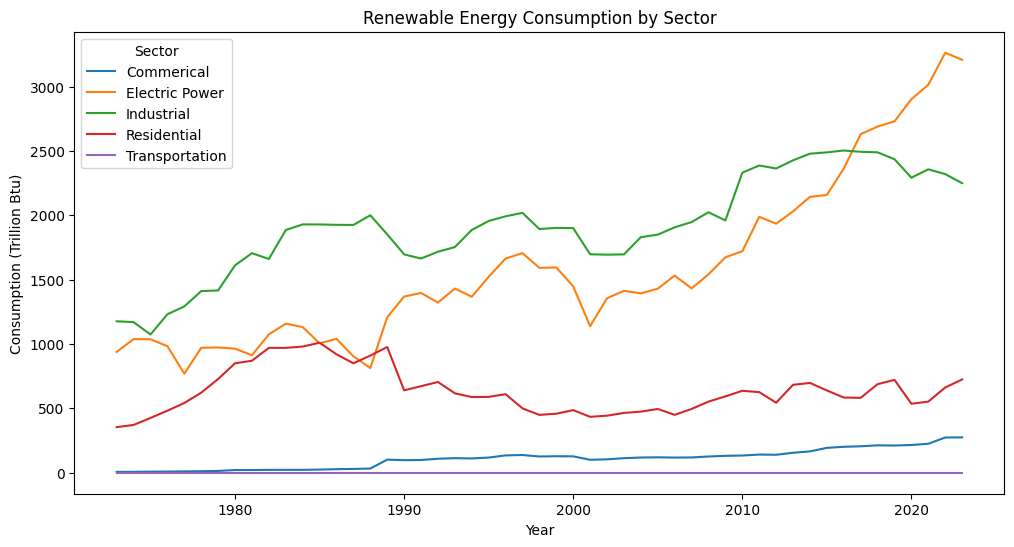

In [58]:
sector_trend = df_clean.groupby(["Year","Sector"])["Total Renewable Energy"].sum().unstack()

sector_trend.plot(figsize=(12,6))
plt.title("Renewable Energy Consumption by Sector")
plt.xlabel("Year")
plt.ylabel("Consumption (Trillion Btu)")
plt.legend(title="Sector")
plt.show()

- Industrial and electric power sectors dominate renewable energy use.
- The electric power sector shows strong growth after 2005, reflecting renewable electricity generation policies.
- Residential and commercial use remain relatively small but stable, showing limited household-scale adoption compared to utility-scale.
- Transportation sector has almost negligible renewable use, highlighting a gap in decarbonization efforts.

### Changing Composition of Renewable Energy Sources Over Time

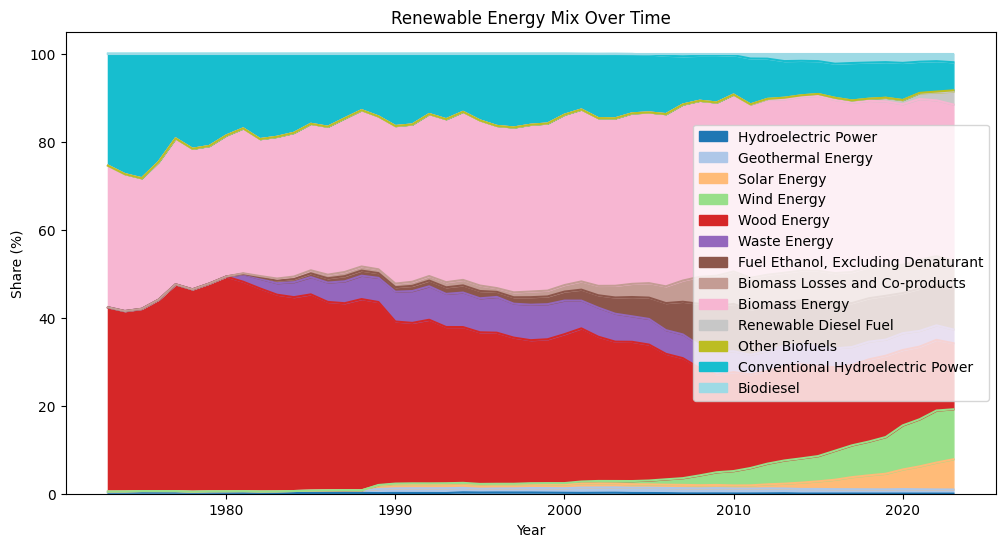

In [59]:
df_mix = df_clean.groupby("Year")[sources].sum()
df_mix_percent = df_mix.div(df_mix.sum(axis=1), axis=0) * 100

df_mix_percent.plot.area(figsize=(12,6), cmap="tab20")
plt.title("Renewable Energy Mix Over Time")
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.show()

- Historically, hydroelectric and wood dominated the renewable mix.
- In recent decades, wind and solar have grown their share, diversifying the energy mix.
- Biomass and biofuels contribute steadily but remain secondary sources.
- The mix shows a transition from a hydro/wood-heavy portfolio to a more balanced and modern renewable system.

### Trends in Renewable Energy Growth Rates (3-Year Rolling Average)

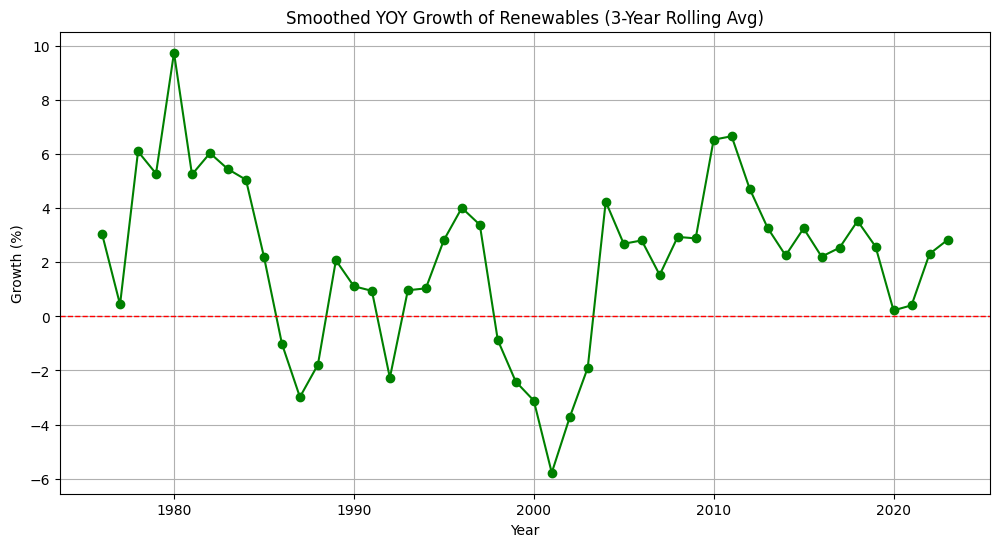

In [60]:
df_yearly = df_clean.groupby("Year")["Total Renewable Energy"].sum()
df_growth = df_yearly.pct_change() * 100


df_growth_smooth = df_growth.rolling(3).mean()

plt.figure(figsize=(12,6))
plt.plot(df_growth_smooth.index, df_growth_smooth.values, marker="o", color="green")
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Smoothed YOY Growth of Renewables (3-Year Rolling Avg)")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.grid(True)
plt.show()

- Growth rates have been volatile, with periods of contraction (e.g., early 2000s) and strong expansion (post-2010).
- Despite fluctuations, the overall trend is positive, showing resilience in renewable adoption.
- Recent years remain above 0%, suggesting a sustained long-term growth trajectory.

### Best and Worst Years of Renewable Energy Growth

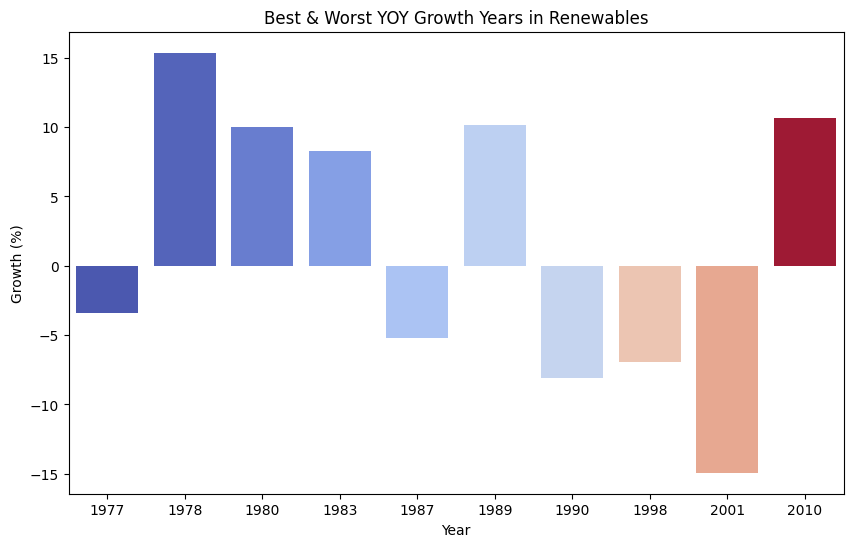

In [61]:
top_growth = df_growth.sort_values(ascending=False).head(5)
worst_growth = df_growth.sort_values().head(5)
highlight = pd.concat([top_growth, worst_growth]).sort_index()

plt.figure(figsize=(10,6))
sns.barplot(
    x=highlight.index,
    y=highlight.values,
    hue=highlight.index,  
    palette="coolwarm",
    legend=False           
)
plt.title("Best & Worst YOY Growth Years in Renewables")
plt.xlabel("Year")
plt.ylabel("Growth (%)")
plt.show()

### Renewable Energy Growth Summary

- **Peak Growth:** 1978: 15.5%, with strong growth in 1980 and 1989 (10%).  
- **Declines:** Steepest drop in 2001: 15%, moderate declines in 1990 and 1998 (7%–8%), smaller dips in 1987 (5%) and 1977 (3%).  
- **Trends:** Growth has been volatile, with high growth in the late 1970s–early 1980s and notable declines in the late 1990s–early 2000s, likely due to industry or policy challenges.